共轭梯度法 再解例3.1 (并与最速下降法对比)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(-110, 110, 1000)
x2 = np.linspace(-110, 110, 1000)
X1, X2 = np.meshgrid(x1, x2)

G1 = np.array([[21, 4], [4, 15]])
G2 = np.array([[21, 4], [4, 1]])
b = np.array([2, 3])
c = 10


def quadFun(G, b, c, x1, x2):
    return 0.5*(G[0, 0]*x1**2 + 2*G[0, 1]*x1*x2+G[1, 1]*x2**2)+b[0]*x1+b[1]*x2


def descent(G, b, x):
    return np.dot(G, x) + b

In [12]:
# 用最速下降法求二次函数极小点
iter = 0
x0 = np.array([-30, 100])
eps = 0.00001

path1 = []
g = descent(G2, b, x0)

while iter < 100:
    path1.append(x0)

    d = -g
    a = np.dot(-g.T, d) / np.dot(np.dot(d.T, G2), d)
    x = x0 + a*d
    g = descent(G2, b, x)

    print(iter, "x:", x, " g:", g)

    if np.linalg.norm(g) < eps:
        break
    x0 = x
    iter += 1

0 x: [-19.38676944 100.79133737]  g: [-1.95680883 26.2442596 ]
1 x: [-15.60461866  50.06602097]  g: [-125.43290794   -9.35245366]
2 x: [-9.76581001 50.50137074]  g: [-1.07652729 14.43813069]
3 x: [-7.68508119 22.59512538]  g: [-69.00620349  -5.14519938]
4 x: [-4.4728937  22.83463059]  g: [-0.59224539  7.94305578]
5 x: [-3.32819253  7.48216785]  g: [-37.9633718   -2.83060228]
6 x: [-1.56102579  7.61393028]  g: [-0.32582044  4.36982713]
7 x: [-0.93127493 -0.83214009]  g: [-20.88533386  -1.55723981]
8 x: [ 0.04092184 -0.75965174]  g: [-0.17924827  2.40403563]
9 x: [ 0.38737571 -5.40620949]  g: [-11.48994807  -0.85670665]
10 x: [ 0.92222425 -5.36633044]  g: [-0.09861242  1.32256658]
11 x: [ 1.11282389 -7.92260785]  g: [-6.32112982 -0.47131231]
12 x: [ 1.40706778 -7.90066861]  g: [-0.05425106  0.72760251]
13 x: [ 1.51192509 -9.30699015]  g: [-3.47753375 -0.2592898 ]
14 x: [ 1.6738017 -9.2949204]  g: [-0.02984592  0.4002864 ]
15 x: [  1.73148835 -10.06860022]  g: [-1.91314548 -0.14264681]
16

In [13]:
# 用共轭梯度法求二次函数极小点
iter = 0
x0 = np.array([-30, 100])
eps = 0.00001

path2 = []
g = descent(G2, b, x0)
d = -g
x = x0

while iter < 65:
    path2.append(x0)

    g_new = descent(G2, b, x)
    beta = np.dot(g_new.T, g_new) / np.dot(g.T, g)
    d = -g_new + beta * d # 共轭梯度的迭代方向

    a = np.dot(-g_new.T, d) / np.dot(np.dot(d.T, G2), d)
    x = x0 + a*d

    print(iter, "x:", x, " g:", g, " d:", d)

    g = g_new
    if np.linalg.norm(g) < eps:
        break
    x0 = x
    iter += 1

0 x: [-19.38676944 100.79133737]  g: [-228  -17]  d: [456.  34.]
1 x: [-3.92700136 50.93672051]  g: [-228  -17]  d: [  7.99857341 -25.79377715]
2 x: [  2.84749568 -13.6237008 ]  g: [-1.95680883 26.2442596 ]  d: [  69.11541448 -658.6644367 ]
3 x: [  2.53589605 -13.75126211]  g: [123.27985337  38.22871505]  d: [-7.07892545 -2.89793999]
4 x: [  2.38491327 -13.46227673]  g: [7.30260601 0.76628191]  d: [-0.30537848  0.5845032 ]
5 x: [  1.96843727 -10.95154689]  g: [ 0.24876857 -0.60767792]  d: [-1.04573591  6.30422964]
6 x: [  1.98643458 -10.93235119]  g: [-1.7659282  -0.92262364]  d: [0.40946558 0.43673083]
7 x: [  1.98814534 -10.93379621]  g: [-0.46900484 -0.0777978 ]  d: [ 0.01497258 -0.01264689]
8 x: [  2.00116683 -10.9987749 ]  g: [-0.01427855  0.01338714]  d: [ 0.00776461 -0.03874627]
9 x: [  2.00035599 -11.00165946]  g: [0.01586725 0.01878514]  d: [-0.01785541 -0.06352021]
10 x: [  2.00031006 -11.00164966]  g: [0.02940381 0.00589242]  d: [-0.00085289  0.00018202]
11 x: [  1.99999202 

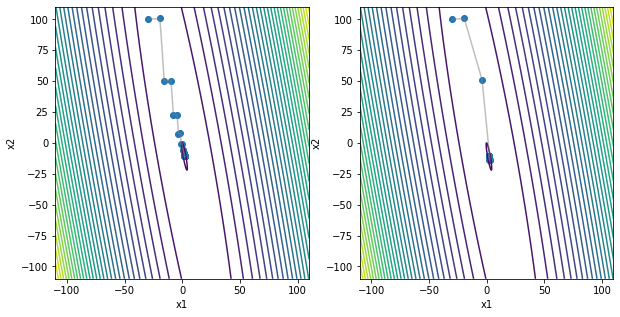

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.contour(X1, X2, quadFun(G2, b, c, X1, X2), levels=30)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.scatter(*zip(*path1), marker='o')
ax1.plot(*zip(*path1), linestyle='-', color='gray', alpha=0.5)

ax2.contour(X1, X2, quadFun(G2, b, c, X1, X2), levels=30)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.scatter(*zip(*path2), marker='o')
ax2.plot(*zip(*path2), linestyle='-', color='gray', alpha=0.5)

plt.show()

可看出共轭梯度比最速下降法快得多.